# Analysing sound wave using fast Fourier transform

## Sound wave

A sound wave consists of compression and rarefaction of air molecules, which travels through space with sound speed $c_s$.
The figure below depicts the propagation of a _sinusoidal_ sound wave inside an infinitely long rectangular channel.
The figure shows the snapshots of the air molecules (represented by blue dots in the figure) at four different instantaneous time $t=0\,\text{s}$, $0.001\,\text{s}$, $0.002\,\text{s}$, and $0.003\,\text{s}$.
The regions of high density are called the compression regions (these look like fuzzy vertical blue bands in the figure) and the regions of low density are called the rarefaction regions.
In the figure, these bands of compression and rarefaction regions travel along the positive $x$-direction with speed equals to the sound speed $c_s$.
Note that the air particles themselves do not drift in any direction.
If you track the individual particles, _e.g._ the red particle in the figure below, the particles oscillate back and forth around the same positions.
In other words, a sound wave is a propagation of energy but not mass.
The wavelength of this sinusoidal sound wave is defined by the distance between two nearest compression bands, which is equal to $\lambda=2\,\text{m}$.
As we can see from the figure, after time $t=0.003\,\text{s}$, the bands will have travelled a distance of $1\,\text{m}$.
Therefore the speed of sound in this example is equal to:
\begin{equation}
c_s = \frac{1\,\text{m}}{0.003\,\text{s}} \simeq 333\,\text{ms}^{-1}.
\end{equation}
In general, the speed of sound depends on various factors such as ambient pressure and temperature.

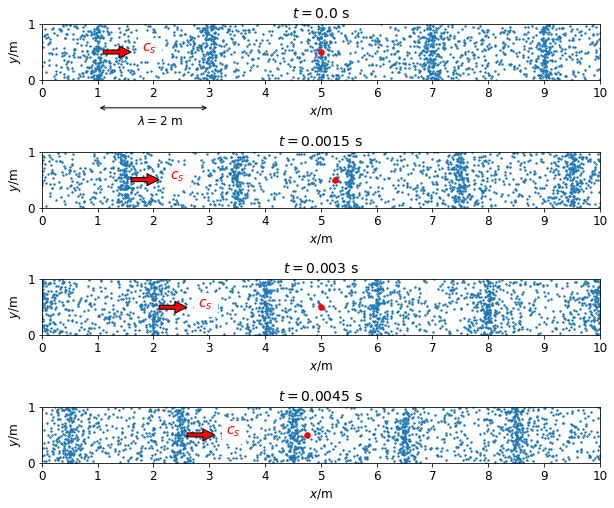

In [108]:
import matplotlib.pyplot as plt
import numpy as np

Np = 6000 # number of particles
Lx, Ly = 10, 1
Dx = 0.25 # maximum displacement
lamb = 1.0 # wavelength
phi = 0.0 # phase difference

t = np.arange(0, 0.0046, 0.0015)
t[0], t[1], t[2], t[3] = 0.0, 0.0015, 0.003, 0.0045

fig, ax = plt.subplots(4, figsize=(10,9))

for n in range(0, 4, 1):
    x = np.random.uniform(-Lx, 2*Lx, Np)
    y = np.random.uniform(0, Ly, Np)
    phi = np.pi/2*n
    x = x + Dx*np.sin(np.pi*x/lamb - phi)
    xtag = 5 + Dx*np.sin(np.pi*5/lamb - phi)
    ytag = 0.5

    ax[n].set_title(f'$t = ${t[n]} s', fontsize=14)
    ax[n].set_xlabel('$x/$m', fontsize=12)
    ax[n].set_ylabel('$y/$m', fontsize=12)
    ax[n].set_xlim(0, Lx)
    ax[n].set_ylim(0, Ly)
    ax[n].set_aspect(1)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].set_yticks(np.arange(0, 2, 1))
    ax[n].set_xticks(np.arange(0, 11, 1))
    ax[n].scatter(x, y, s=2)
    ax[n].scatter(xtag, ytag, s=30, c='red')
    ax[n].annotate('', xy=(1.6+n/2,0.5), xytext=(1.1+n/2,0.5), arrowprops=dict(facecolor='red'))  
    ax[n].annotate('$c_s$', fontsize=14, backgroundcolor='white', c='red', xy=(1.8+n/2,0.5))  

ax[0].annotate('', c='black',
            xy=(1.0,-0.5),  # location of the arrow tip
            xytext=(3.0,-0.5),  # location of arrow base (and text)
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax[0].annotate('$\lambda=2$ m', c='black', fontsize=12, xy=(1.7,-0.8), annotation_clip=False)

plt.show()

Now suppose that that we place a microphone at the end of the channel.
The compression and rarefaction of air will cause the diaphragm inside the microphone to vibrate.
This vibration is then converted into an electrical signal, which is shown in the figure below.
The horizontal axis in the figure represents the time $t$ (in units of seconds).
The vertical axis represents the voltage of the electrical signal produced by the microphone $V(t)$ (in some rescaled units, which we do not need to worry about).
As we can see in this example, the audio signal in the figure below has a sinusoidal form, which can be descibed by a trigonometric function:
\begin{equation}
V(t) = A\cos(\omega t + \phi),
\end{equation}
where $V(t)$ is the audio signal (in some rescaled units), $t$ is time (in seconds), $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase difference.
The angular frequency $\omega$ is related to the frequency $f$ and period $T$ of the sound wave through this relation:
\begin{equation}
\omega = 2\pi f = \frac{2\pi}{T}. 
\end{equation}
From the plot below, we can measure the period to be $T=0.006\,\text{s}$, which translates to audio frequency of $f=\frac{1}{T}\simeq167\,\text{Hz}$.
Hz (prounounced as Hertz) is the SI unit of frequency, defined to be $1\,\text{Hz}=1\,\text{s}^{-1}$.

In the equation above, $V$, $A$, $\omega$, $\phi$, and $t$ are all real. 
However, sometimes it might be useful to write the audio signal in a complex form (as we shall see later in Fourier series) as follows:
\begin{equation}
V(t) = C e^{i\omega t} + C^{*} e^{-i\omega t} \text{, where $C=\frac{A}{2}e^{i\phi}$ is the complex amplitude (the rest of the variables are real).}
\end{equation}
The star $*$ above $C$ indicates complex conjugate operation.

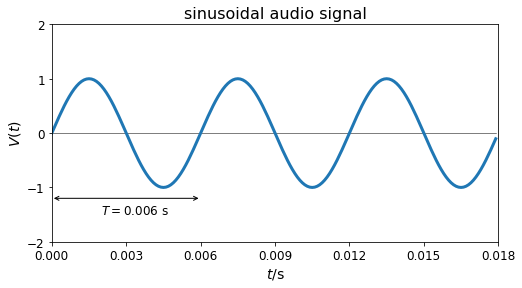

In [109]:
T = 0.006 # period
dt = 0.0001 # timestep
t = np.arange(0, 0.018, dt)
omega = np.pi*2/T
V = np.sin(omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('sinusoidal audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.018)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.019, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.2), xytext=(0.006,-1.2),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.5), annotation_clip=False)

plt.show()

## Fourier series

In the plot above, the audio signal can be described by a single trigonometric function.
This is because we have assumed the sound wave to be sinusoidal.
However this is not true in general.
For example, the sound wave coming from a tuning fork is very close to a sinusoidal wave,
on the other hand, the sound wave coming from a saxophone is far from being sinusoidal.

Let us consider another audio signal from an unknown musical instrument, which is depicted in the figure below.
We can immediately tell that the signal is periodic with the same period $T=0.006\,\text{s}$ (or fundamental frequency $f\simeq167\,\text{Hz}$) as the one above.
However, the shape of the audio signal is much more complicated than a sinusoidal wave and cannot be simply described by a single trigonometric function.
Luckily, Fourier series allows us to decompose this periodic signal into a sum of trigonometric functions as follows:
\begin{equation}
V(t) = \sum_{p=-\infty}^{\infty} C_p e^{i\omega_p t} \text{, where }\omega_p=\frac{2\pi p}{T} \text{ and } p\in\mathbb{Z}.
\end{equation}
Each term in the Fourier series is a simple sinusoidal wave with angular frequency $\omega_p$ and
complex amplitude $C_p$'s.
The first non-constant term in the Fourier series corresponds to the _fundamental frequency_
$\omega_1 = \frac{2\pi}{T}$ shown by the first figure in the second row below.
The next term in the Fourier series has double the fundamental frequency $\omega_2=\frac{4\pi}{T}$ 
and is sometimes called the second harmonic (see the second figure in the second row below). 
The next next term has triple the fundamental frequency $\omega_3=\frac{6\pi}{T}$ and is sometimes called the third harmonic (see the third figure in the second row below).

To find the complex amplitudes $C_p$'s (or Fourier coefficients) we multiply the above equation by $e^{-i\omega_q t}$ and then integrate with respect to $t$ over one period from $t=-\frac{T}{2}$ to $t=\frac{T}{2}$.
\begin{equation}
\int_{-\frac{T}{2}}^{\frac{T}{2}} V(t) e^{-i\omega_q t}\,dt = \sum_{p=-\infty}^{\infty} C_p \int_{-\frac{T}{2}}^{\frac{T}{2}} e^{i(\omega_p - \omega_q) t}\,dt,
\end{equation}
where $p$ and $q$ are integers.
We note that the integral:
\begin{equation}
\int_{-\frac{T}{2}}^{\frac{T}{2}} e^{i(\omega_p - \omega_q) t}\,dt = \int_{-\frac{T}{2}}^{\frac{T}{2}} e^{i\frac{2\pi}{T}(p-q) t}\,dt =
\begin{cases}
T & \text{if } p = q \\
0 & \text{if } p \neq q
\end{cases}.
\end{equation}
More succintly, we can write,
\begin{equation}
\int_{-\frac{T}{2}}^{\frac{T}{2}} e^{i(\omega_p - \omega_q) t}\,dt = T \delta_{pq},
\end{equation}
where the Kronecker delta $\delta_{pq}$ is defined to be equal to $1$ if $p=q$ and $0$ if $p\neq q$.
Therefore,
\begin{align}
\int_{-\frac{T}{2}}^{\frac{T}{2}} V(t) e^{-i\omega_q t}\,dt &= \sum_{p=-\infty}^{\infty} C_p T \delta_{pq} = T C_q \\
\Rightarrow C_p &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} V(t) e^{-i\omega_p t}\,dt.
\end{align}

__Exercise 1.__
(a) Show that if $C_{-p}=C_p^*$ for all $p\in\mathbb{Z}$, then $V(t)$ is real.
(b) Show that if $V(t)$ is real, then $C_{-p}=C_p^*$ for all $p\in\mathbb{Z}$.

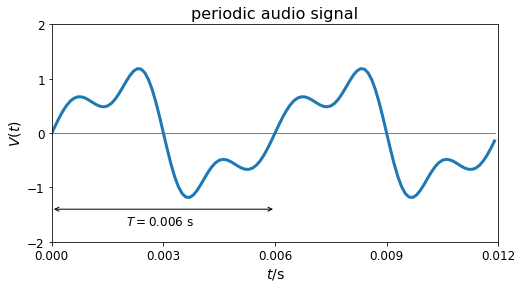

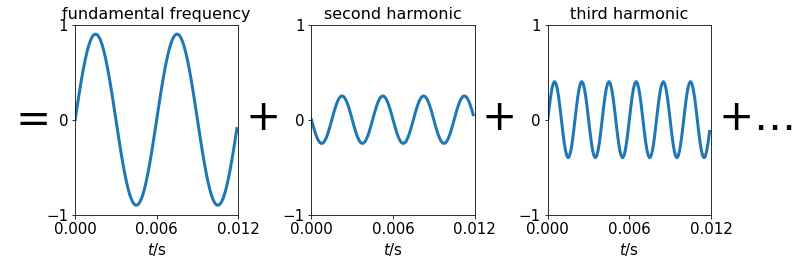

In [110]:
dt = 0.0001
T = 0.006
omega = np.pi*2/T
t = np.arange(0, 0.012, dt)
V = 0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t)
sin1 = 0.9*np.sin(omega*t)
sin2 = - 0.25*np.sin(2*omega*t)
sin3 = 0.4*np.sin(3*omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('periodic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.012)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.013, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.4), xytext=(0.006,-1.4),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7))

plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

for n in range(0, 3, 1):
    ax[n].set_xlabel('$t/$s', fontsize=15)
    ax[n].set_xlim(0, 0.012)
    ax[n].set_ylim(-1, 1)
    ax[n].set_aspect(0.007)
    ax[n].tick_params(axis='both', which='major', labelsize=15)
    ax[n].set_yticks(np.arange(-1, 1.1, 1))
    ax[n].set_xticks(np.arange(0, 0.013, 0.006))

ax[0].set_title('fundamental frequency', fontsize=16)
ax[0].plot(t, sin1, linewidth=3)
ax[0].annotate('$=$', c='black', fontsize=42, xy=(-0.005, -0.1), annotation_clip=False)
ax[0].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[1].set_title('second harmonic', fontsize=16)
ax[1].plot(t, sin2, linewidth=3)
ax[1].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[2].set_title('third harmonic', fontsize=16)
ax[2].plot(t, sin3, linewidth=3)
ax[2].annotate('$+\dots$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)

plt.show()

## Dirac delta function

Let us define the rectangular function of width $\epsilon$ and area $1$ to be:
\begin{equation}
R_\epsilon(x) =
\begin{cases}
\frac{1}{\epsilon} &\text{if } -\frac{\epsilon}{2} \le x \le \frac{\epsilon}{2} \\
0 &\text{otherwise}
\end{cases},
\end{equation}
where $x\in\mathbb{R}$.
Clearly, the integral of $R_\epsilon(x)$ over $x\in(-\infty,\infty)$ (or area under the curve) is equal to $1$, irrespective of $\epsilon$.
Now the Dirac delta function is defined to be the limit:
\begin{equation}
\delta(x) = \lim_{\epsilon\rightarrow0} R_\epsilon(x).
\end{equation}
Pictorially, we can imagine the width of the rectangular function becoming narrower and narrower and the height becoming higher and higher (while maintaining the area under the curve to be $1$), as we can see in the figure below.
In this limit, the Dirac delta function $\delta(x-y)$ has zero value everywhere except at $x=y$:
\begin{equation}
\delta(x - y) = 
\begin{cases}
0 &\text{if } x\neq y \\
\infty &\text{if } x = y
\end{cases},
\end{equation}
where $x,y\in\mathbb{R}$.
The Dirac delta function will be useful later in Fourier transform due to the following properties:
\begin{align}
\int_{-\infty}^\infty \delta(x - y)\,dx &= 1 \\
\int_{-\infty}^\infty \delta(x - y)f(x)\,dx &= f(y).
\end{align}
The first property follows directly from the definition of the Dirac delta function as a limit of rectangular function.

__Exercise 2.__
From the definition $\delta(x)=\lim_{\epsilon\rightarrow0}R_\epsilon(x)$, prove the second property of the Dirac delta function above. 

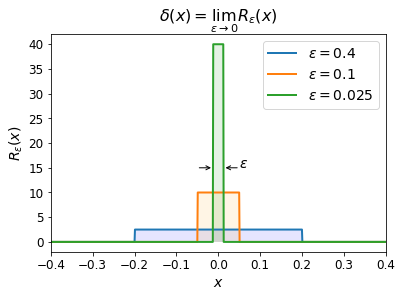

In [121]:
dx = 0.001 # timestep
x = np.arange(-2, 2, dx)
def rectangle(x, epsilon):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i]) <= 0.5*epsilon:
            y[i] = 1.0/epsilon
        else:
            y[i] = 0.0
    return y

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('$\delta(x)=\lim_{\epsilon\\rightarrow0}R_\epsilon(x)$', fontsize=16)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$R_\epsilon(x)$', fontsize=14)
ax.set_xlim(-0.4, 0.4)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(x, rectangle(x, 0.4), linewidth=2, label='$\epsilon=0.4$')
ax.plot(x, rectangle(x, 0.1), linewidth=2, label='$\epsilon=0.1$')
ax.plot(x, rectangle(x, 0.025), linewidth=2, label='$\epsilon=0.025$')

ax.annotate('', c='black', xy=(-0.0125,15), xytext=(-0.05,15),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'))

ax.annotate('', c='black', xy=(0.0125,15), xytext=(0.05,15),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'))

ax.annotate('$\epsilon$', c='black', fontsize=14, xy=(0.05,15))

ax.fill_between(x, rectangle(x,0.4), x*0, facecolor='blue', alpha=0.1)
ax.fill_between(x, rectangle(x,0.1), x*0, facecolor='orange', alpha=0.1)
ax.fill_between(x, rectangle(x,0.025), x*0, facecolor='green', alpha=0.1)

plt.legend(fontsize=14)
plt.show()

## Fourier transform

In reality, the audio signal is not perfectly periodic since it might be contaminated by a background noise. 
Furthermore the oscillation of the sound wave itself decays gradually to zero, 
so a realistic representation of an audio signal recorded from a microphone might look something like the plot below.

To analyse this audio signal, we shall use Fourier transform, which is an extension of the Fourier series above by taking the limit $T\rightarrow\infty$ (loosely speaking, the function $V(t)$ is no longer periodic).
First let us recall the definition of the complex form of the Fourier series:
\begin{align}
V(t) &= \sum_{p=-\infty}^{\infty} \tilde{V}(\omega_p) e^{i\omega_p t} \quad\text{(Fourier series)} \\
\tilde{V}(\omega_p) &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} dt \, V(t) e^{-i\omega_p t}. \quad\text{(Fourier series coefficients)}.
\end{align}
Note that we have relabelled $C_p\rightarrow\tilde{V}(\omega_p)$ from the definitions given in the previous section.
The angular frequency $\omega_p$ is an integer multiple of $\frac{2\pi}{T}$, _i.e._
\begin{equation}
\omega_p = \frac{2\pi p}{T},\quad\text{where }p=0,\pm 1,\pm 2,\dots.
\end{equation}
Now let us consider the first equation from the Fourier series above, which we can write as
\begin{align}
V(t) = \sum_{p=-\infty}^{\infty}\Delta p \, \tilde{V}(\omega_p) e^{i\omega_p t},
\end{align}
since $\Delta p = (p+1) - p = 1$.
Now from the definition of the angular frequency, we have $\Delta\omega_p=\frac{2\pi}{T}\Delta p$, and thus
\begin{align}
V(t) = \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \, \tilde{V}(\omega_p) e^{i\omega_p t}.
\end{align}
Substituting the second equation from the Fourier series for $\tilde{V}(\omega_p)$, we get:
\begin{align}
V(t) &= \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{-i\omega_p t'}\right] e^{i\omega_p t} \\
&= \frac{1}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[ \int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{i\omega_p(t-t')} \right].
\end{align}
Finally we can take the limit $T\rightarrow\infty$.
In this case $\omega_p$ becomes continuous $\omega_p\rightarrow\omega\in\mathbb{R}$ and the summation over $\omega_p$ becomes an integral over $\omega$:
\begin{align}
V(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \,  
\left[\int_{-\infty}^{\infty} dt' \, V(t') e^{i\omega(t-t')} \right] \\
&= \int_{-\infty}^{\infty} dt' \, V(t') 
\left[\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')} \right].
\end{align}
Note that we have swapped the order of integration in the last line.
The right hand side has to be equal to $V(t)$, which implies the term inside the square bracket in the last line above must be the Dirac delta function:
\begin{equation}
\delta(t-t') = \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')}.
\end{equation}
Now we can define the Fourier transform to be a transformation from one function $V(t)$ to another function $\tilde{V}(\omega)$:
\begin{align}
V(t):\mathbb{R}\rightarrow\mathbb{C} 
\begin{matrix}
\overset{\text{Fourier transform}}{\longrightarrow} \\
\underset{\text{inverse Fourier transform}}{\longleftarrow}
\end{matrix}
\tilde{V}(\omega):\mathbb{R}\rightarrow\mathbb{C},
\end{align}
through the following formula:
\begin{align}
V(t) &= \int_{-\infty}^\infty \tilde{V}(\omega) e^{i\omega t} d\omega 
\quad\text{(inverse Fourier transform)}\\
\tilde{V}(\omega) &= \frac{1}{2\pi}\int_{-\infty}^\infty V(t) e^{-i\omega t} dt
\quad\text{(Fourier transform).}
\end{align}
Note that the independent variables $t$ and $\omega$ are real, but the dependent variables $V$ and $\tilde{V}$ are complex in general.
In our case, $V(t)$ represents the audio signal and hence $V$ happens to be real.
We sometimes say the original $V(t)$ to live in the time-space and its Fourier transform $\tilde{V}(\omega)$ to live in the frequency space.  

__Exercise 3.__
Show that if $V(t)$ is real then $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ for all $\omega\in\mathbb{R}$ and _vice versa_.

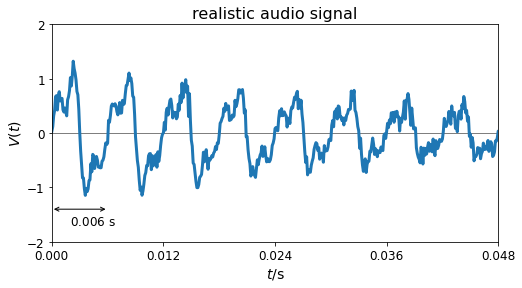

In [112]:
dt = 0.0001
T = 0.006
omega = np.pi*2/T
t = np.arange(0, 0.192, dt)
V = (0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t))*np.exp(-t/0.05) + 0.1*np.random.normal(0,1, np.shape(t))

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('realistic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.048)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.049, 0.012))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black', xy=(0.0,-1.4), xytext=(0.006,-1.4),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7))

plt.show()

## Energy spectrum

From electromagnetism, we learnt that the rate of power dissipation is given by:
\begin{equation}
P(t) = \frac{V(t)^2}{R},\quad\text{where $R$ is the electrical resistance.}
\end{equation}
Since power is energy per unit time, the total energy dissipation is then given by the time integral
\begin{equation}
E = \frac{1}{R}\int_{-\infty}^\infty V(t)^2\,dt
\end{equation}
Substituting the definition for Fourier transform to the above, we get:
\begin{align}
E &= \frac{1}{R} \int dt \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') e^{i (\omega + \omega') t} \\
&= \frac{2\pi}{R} \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') \delta(\omega + \omega') \\
&= \frac{2\pi}{R} \int d\omega \, \tilde{V}(\omega) \tilde{V}(-\omega) 
\end{align}
Since $V(t)$ is real, we have $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ from the previous exercise
and thus the total energy dissipation can be written as:
\begin{equation}
E = \frac{2\pi}{R} \int_{-\infty}^\infty d\omega \, |\tilde{V}(\omega)|^2 
\end{equation}
Now we can define the energy spectrum to be $\tilde{E}(\omega)=|\tilde{V}(\omega)|^2$.
Physically, Fourier transform allows us to decompose an electrical signal into an infinite sum of sinusoidal oscillations with different angular frequencies $\omega$'s.
The energy spectrum $\tilde{E}(\omega)$ gives the energy contribution from a single oscillation with corresponding angular frequency $\omega$.

The figure below shows the energy spectrum $\tilde{E}(f)$ as a function of frequency $f$, which corresponds to the realistic audio signal $V(t)$, shown in the previous figure.
Note that the frequency $f$ is related to the angular frequency by a factor of $2\pi$, _i.e._ $\omega=2\pi f$.
As we can see in the figure below, the energy spectrum spectrum is symmetric with respect to $f\rightarrow-f$
(and for this reason, $\tilde{E}(f)$ is usually plotted on the positive $x$-axis only).
Furthermore we also observe several sharp peaks in the energy spectrum.
The first peak $f\simeq167\,\text{Hz}$ corresponds to the fundamental frequency of the signal.
(Although the signal is no longer periodic, it still retains some underlying periodic characteristics.)
The second peak $f\simeq333\,\text{Hz}$ (which is double the fundamental frequency) corresponds to the second harmonic and so on.
If the signal $V(t)$ had been purely periodic, then the energy spectrum $\tilde{E}(f)$ would have been strictly zero everywhere except at $f=$ multiple integers of the fundamental frequency.

__Exercise 4.__
Show that the energy spectrum is symmetric, _i.e._ $\tilde{E}(\omega)=\tilde{E}(-\omega)$. 

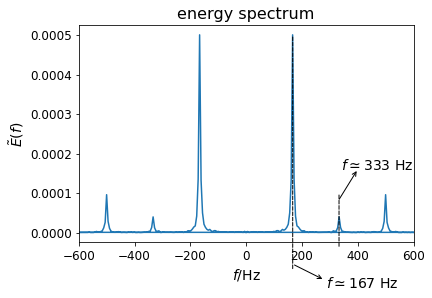

In [113]:
N = np.shape(V)[0]
f = 1/(N*dt)*np.concatenate((np.arange(0, N/2, 1), np.arange(-N/2, 0, 1)))

Vtilde = np.fft.fft(V)*dt # Fourier transform of V(t), Vtilde(omega)

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('energy spectrum', fontsize=16)
ax.set_xlabel('$f/$Hz', fontsize=14)
ax.set_ylabel('$\\tilde{E}(f)$', fontsize=14)
ax.set_xlim(-600, 600)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.plot(f, np.real(Vtilde*np.conjugate(Vtilde)))

ax.annotate('', c='black', xy=(167,-0.0001), xytext=(167,0.0005),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='-', linestyle='--'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(280,-0.00012), xytext=(167,-0.00008),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(333,-0.00004), xytext=(333,0.0001),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='-', linestyle='--'),
            annotation_clip=False)

ax.annotate('', c='black', xy=(400,0.00016), xytext=(330,0.00008), 
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'),
            annotation_clip=False)

ax.annotate('$f\simeq 167$ Hz', c='black', fontsize=14, xy=(285,-0.00014), annotation_clip=False)
ax.annotate('$f\simeq 333$ Hz', c='black', fontsize=14, xy=(340,0.00016), annotation_clip=False)

plt.show()

## Storing audio wave into a computer

Let's say we record a sound on our microphone for the total duration of $t_N$ (also called the sampling time). 
How is this audio signal $V(t)$ stored inside our computer?
Obviously a computer cannot store an infinite amount of information, so the computer has to divide the signal $V(t)$ into discrete values $V(t_0),V(t_1),V(t_2),\dots,V(t_{N-1})$ at discrete times $t_n$'s, as we can see in the figure below.
This also means that the time is discretized into:
$t\rightarrow t_n=n\Delta t$, where $n=0,1,2,\dots,N-1$ and $\Delta t$ is the timestep.
In the figure below, the total time (or sampling time) is $t_N=0.018\,\text{s}$, the timestep is $\Delta t = 0.001\,\text{s}$, and the total number of points is $N=18$.
We also define the framerate to be the total number of points per unit time.
In the figure below, we can calculate the framerate to be:
\begin{equation}
\text{framerate} = \frac{N}{t_N} = \frac{18}{0.018\,\text{s}} = 1000\,\text{s}^{-1}.
\end{equation}
Usually, when we record a sound using recording software such as Audacity, we need to specify this framerate.
Higher framerate will give a better sound quality but the file size will also be bigger!
For a 16-bit digital audio, the values of $V$ ranges from $-32768$ to $32767$ in integer steps (note that $V(t)$ is in some rescaled units).
Therefore the vertical $V$-axis is also discrete. 

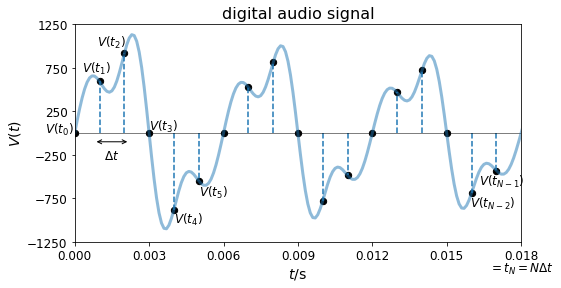

In [114]:
t = np.arange(0, 0.192, 0.0001)
t_discrete = np.arange(0, 0.018, 0.001)
omega = np.pi*2/T
V = (0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t))*np.exp(-t/0.05)*1000
V_discrete = (0.9*np.sin(omega*t_discrete) - 0.25*np.sin(2*omega*t_discrete) + 0.4*np.sin(3*omega*t_discrete) - 0.05*np.sin(4*omega*t_discrete))*np.exp(-t_discrete/0.05)*1000

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('digital audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.018)
ax.set_ylim(-1250, 1250)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-1250, 1300, 500))
ax.set_xticks(np.arange(0, 0.019, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3, alpha=0.5)
ax.scatter(t_discrete, V_discrete, c='black', s=40)
ax.stem(t_discrete, V_discrete, markerfmt=' ', basefmt=' ', linefmt='--', use_line_collection=True)

ax.annotate('', c='black', xy=(0.0008,-100), xytext=(0.0022,-100),  
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$\Delta t$', c='black', fontsize=12, xy=(0.0012,-300), annotation_clip=False)
ax.annotate('$= t_N = N\Delta t$', c='black', fontsize=12, xy=(0.0167,-1600), annotation_clip=False)
ax.annotate('$V(t_0)$', c='black', fontsize=12, xy=(-0.0012,0.0), annotation_clip=False)
ax.annotate('$V(t_1)$', c='black', fontsize=12, xy=(0.0003,700), annotation_clip=False)
ax.annotate('$V(t_2)$', c='black', fontsize=12, xy=(0.0009,1000), annotation_clip=False)
ax.annotate('$V(t_3)$', c='black', fontsize=12, xy=(0.003,40), annotation_clip=False)
ax.annotate('$V(t_4)$', c='black', fontsize=12, xy=(0.004,-1030), annotation_clip=False)
ax.annotate('$V(t_5)$', c='black', fontsize=12, xy=(0.005,-720), annotation_clip=False)
ax.annotate('$V(t_{N-1})$', c='black', fontsize=12, xy=(0.0163,-595), annotation_clip=False)
ax.annotate('$V(t_{N-2})$', c='black', fontsize=12, xy=(0.01595,-850), annotation_clip=False)

plt.show()

## Discrete Fourier transform

Now how do we perform a Fourier transform operation on the discrete signal $V(t_0),V(t_1),V(t_2)\dots,V(t_{N-1})$ shown above?
First let us define a vector $(V(t_0),V(t_1),V(t_2)\dots,V(t_{N-1}))^T$.
The discrete Fourier transform of an _ordered_ set of $N$ data points $V(t_n)$ in time-space is defined to be an ordered set of $N$ points $\tilde{V}(\omega_p)$ in the frequency-space.
Here the angular frequencies are discrete:
\begin{equation}
\omega_p = \frac{2\pi p}{t_N}, \quad\text{where } p=0,1,2,\dots,N-1 \text{ and } t_N=N\Delta t.
\end{equation}
$\{V(t_n)\}$ and $\{\tilde{V}(\omega_p)\}$ are defined through the following relations:
\begin{align}
V(t_n) &= \sum_{p=0}^{N-1} \tilde{V}(\omega_p)e^{i\omega_p t_n} \\
\tilde{V}(\omega_p) &= \frac{1}{N}\sum_{n=0}^{N-1} V(t_n)e^{-i\omega_p t_n}.
\end{align}


## Importing  `.wav` file

There are different audio formats in computer such as `.mp3` and `.wav`.
The difference is that the former is a compressed file while the later is an uncompressed file.
In this Tutorial, we will only consider `.wav` files. 

Let us now put everything we have learnt above into practice. 
Inside the folder `./samples/` we have various `.wav` files from different notes from different musical instruments.
First let us have a look at the file called `./samples/piano-C4.wav`. 
This is a recording of the note C4 in a piano.
This note has a fundamental frequency of $261.63\,\text{Hz}$.
Let us now analyse this wave file below.
First we need to import the essential libraries such as `numpy`, `matplotlib`, `sys` and `scipy.io.wavfile` into Python, 
as you can see in the first few lines of the code below.
The library `sys` is used to access the filesystem inside our computer and the library `scipy.io.wavfile` is used to import and export `.wav` files.
Next we will open the file `./samples/piano-C4.wav` and store it into an object, called `inputfile`,
using the method `wave.open('./samples/piano-C4.wav', 'r')`.
The letter `'r'` indicates that we are reading the file (letter `'w'` indicates writing into a file). 
Before we proceed further, we need some information about this audio signal, which we just imported.
For example, we need the framerate, which we can obtain using the method `.getframerate()`. 
In this case the framerate is $11025\,\text{s}^{-1}$, which we can confirm by printing the value into the screen.
We also need the total number of points, _i.e._ $N$, which we can obtain using the method `.getnframes()`.
In this case we get $N=29750$.
Hence we can calculate the total recording time (or sampling time) $t_N$:
\begin{equation}
t_N = \frac{N}{\text{framerate}} \simeq 2.70\,\text{s}.
\end{equation}
We also need to compute the timestep $\Delta t$:
\begin{equation}
\Delta t = \frac{t_N}{N} = \frac{1}{\text{framerate}} \simeq 0.0000907\,\text{s}.
\end{equation}


In [115]:
import numpy as np
import sys
from scipy.io import wavfile

 # read a .wav file and store it into a numpy array
framerate, V = wavfile.read('./samples/piano-C4.wav')

print(f'framerate = {framerate} s^-1')  # print the framerate into the computer screen

N = len(V)  # get the total number of points
print(f'N = {N}')

tN = N/framerate  # calculate the total sampling time
print(f't_N = {N/framerate} s')

dt = 1/framerate  # calculate the timestep
print(f'dt = {dt} s')

framerate = 11025 s^-1
N = 29750
t_N = 2.6984126984126986 s
dt = 9.070294784580499e-05 s


To read the actual audio signal itself from the `.wav` file, we use the method `.readframes(-1)`.
If you try to print the output you will get something like this:
`b'\xf6\xf1\xff\xf1\xff...\xf2\xff'`.
The strange combination of three characters, separated by backslash, actually represents a binary number.
We need to convert these binary numbers (called bytes objects in Python) into decimals using the numpy method `np.frombuffer(V, dtype=np.int16)`.
The `int16` data type indicates that it is a 16-bit audio, so that the values of $V$ ranges from $-32768$ to $32767$ in integer steps.

Next we can then plot the the audio signal $V(t)$ as a function of time $t$ as shown below.
The plot on the right shows the zoomed-in section.

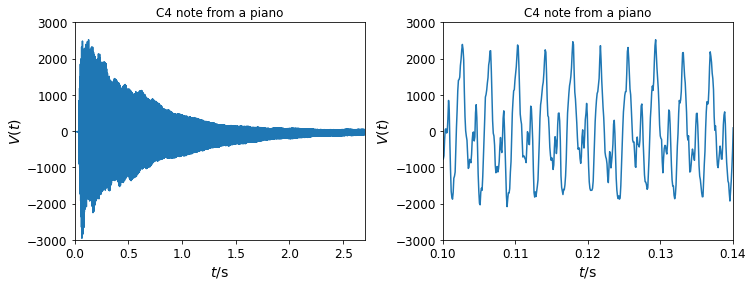

In [150]:
t = np.arange(0, tN, dt)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a piano")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t, V)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/8000)
ax[1].set_xlim(0.1, 0.14)
ax[1].set_aspect(0.04/8000)

plt.show()

We can compare this sound wave with that coming from a flute, shown below.
As we can see the shape of the wave looks different, but the fundamental frequency should be the same, _i.e._ they both correspond to C4.

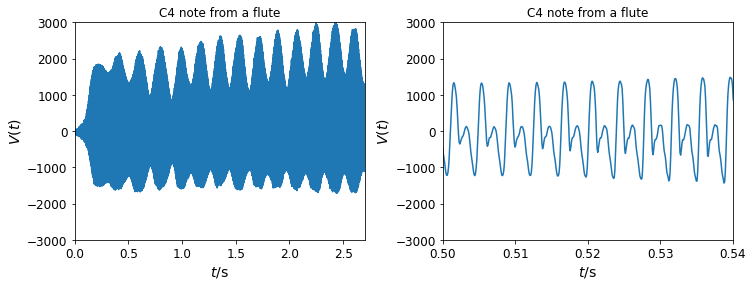

In [162]:
framerate, V = wavfile.read('./samples/flute-C4.wav')

N = len(V)  # get the total number of points
tN = N/framerate  # calculate the total sampling time
dt = 1/framerate  # calculate the timestep

t = np.arange(0, tN, dt)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a flute")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t, V)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/8000)
ax[1].set_xlim(0.5, 0.54)
ax[1].set_aspect(0.04/8000)

plt.show()

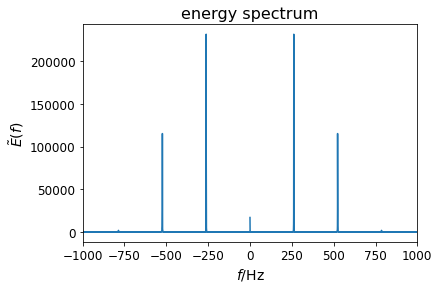

In [118]:
N = np.shape(V)[0]
f = 1/(N*dt)*np.concatenate((np.arange(0, N/2, 1), np.arange(-N/2, 0, 1)))

Vtilde = np.fft.fft(V)*dt # Fourier transform of V(t), Vtilde(omega)

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('energy spectrum', fontsize=16)
ax.set_xlabel('$f/$Hz', fontsize=14)
ax.set_ylabel('$\\tilde{E}(f)$', fontsize=14)
ax.set_xlim(-1000, 1000)
#ax.set_ylim(0, 0.0005)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.set_yticks(np.arange(-2, 2.1, 1))
#ax.set_xticks(np.arange(0, 0.049, 0.012))

ax.plot(f, np.real(Vtilde*np.conjugate(Vtilde)))

plt.show()

### References

1. [Digital Audio Fundamentals, Audacity]
2. [Sound Examples, Dan Ellis, Columbia University]
3. [Playing and Recording Sound in Python, Real Python]
4. [Electronic Music Studios, University of Iowa]


[Electronic Music Studios, University of Iowa]: https://theremin.music.uiowa.edu/MIS.html
[Digital Audio Fundamentals, Audacity]: https://manual.audacityteam.org/man/digital_audio.html
[Sound Examples, Dan Ellis, Columbia University]: https://www.ee.columbia.edu/~dpwe/sounds/
[Playing and Recording Sound in Python, Real Python]: https://realpython.com/playing-and-recording-sound-python/